[View in Colaboratory](https://colab.research.google.com/github/ChiragCKarkera/EIP2-assignment-1/blob/LPRS/LPRS.ipynb)

In [0]:
#Licence plate recognition systems
#LPRS
# https://keras.io/
!pip install -q keras
import keras


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets 

In [0]:
(C_train,d_train), (C_test,d_test) = mnist.load_data()

Distribute to train and test data sets


(60000, 28, 28)


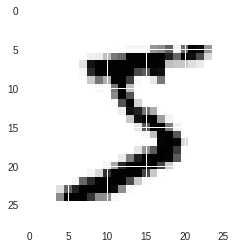

In [23]:
print (C_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(C_train[0])

In [0]:
C_train = C_train.reshape(C_train.shape[0],28,28,1)
C_test = C_test.reshape((C_test.shape[0],28,28,1))

In [0]:
# astype is a method of an array. It takes the values of the array and produces a new array with the desire dtype.
C_train = C_train.astype('float32')
C_test = C_test.astype('float32')

# 8 bit value of each pixel , therefore 2^8 =256 possibilities . # normalize inputs from 0-255 to 0-1

C_train /=255
C_test /=255

In [31]:
d_train [: 10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10 dimensional class matrices
D_train = np_utils.to_categorical(d_train,10)
D_test = np_utils.to_categorical(d_test,10)


In [37]:
D_train [: 10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(Convolution2D(10,1, activation ='relu'))
model.add(Convolution2D(10,26))
model.add(Flatten())
model.add(Activation('softmax'))


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
model.fit(C_train,D_train, batch_size=128,nb_epoch=3, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 6s 93us/step - loss: 0.0014 - acc: 0.9997
Epoch 2/3
60000/60000 [==============================] - 6s 92us/step - loss: 5.3494e-04 - acc: 1.0000
Epoch 3/3
60000/60000 [==============================] - 6s 92us/step - loss: 4.4102e-04 - acc: 1.0000


In [0]:
score = model.evaluate(C_test, D_test, verbose=0)

In [57]:
print (score)
print("CNN Error: %.2f%%" % (100-score[1]*100))


[0.10155909168841158, 0.9822]
CNN Error: 1.78%


In [0]:
d_pred = model.predict(C_test)

In [63]:
print(d_pred[0])


[2.7132829e-34 9.6271954e-36 5.8597674e-27 7.6259543e-18 0.0000000e+00
 1.2773256e-33 0.0000000e+00 1.0000000e+00 6.0694710e-24 4.8851286e-25]


In [62]:
print(d_test[0])

7
